In [1]:
%pip install torch torchvision matplotlib keras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 29.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 54.5 MB/s eta 0:00:00:00:01
   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/25 [libclang]  WARNING: The script wheel is installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━ 12/25 [mdurl]nsum]  WARNING: The script markd

In [2]:
import torch
from torchvision import datasets, transforms

mnist_train = datasets.CIFAR10(
    root='/workspaces/cosc470/data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

mnist_test = datasets.CIFAR10(
    root='/workspaces/cosc470/data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)



In [4]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")


Using CPU


2025-09-30 18:19:07.746409: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-30 18:19:20.090378: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[0.02895285 0.09270654 0.03544445 0.05597321 0.06797025 0.180486
  0.08467096 0.02213987 0.03719083 0.39446503]]
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.06883401 0.10942966 0.09934349 0.07769606 0.09474567 0.10823774
  0.13998793 0.0815805  0.08752512 0.13261981]]


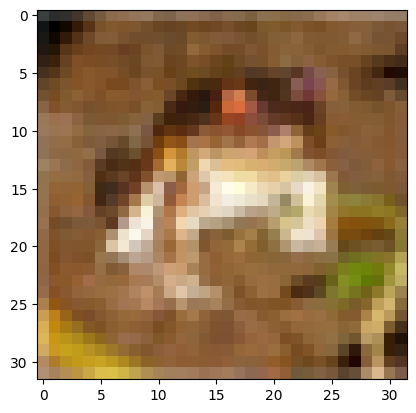

In [3]:
import keras
import os
import torch
os.environ["KERAS_BACKEND"] = "torch"

model = keras.Sequential([
    keras.layers.Conv2D(20, kernel_size=5, activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

random_images = torch.randn(1, 32, 32, 3)
bad_prediction = model.predict(random_images)
print(bad_prediction)
real_image = mnist_train[0][0].unsqueeze(0)
import matplotlib.pyplot as plt
plt.imshow(mnist_train[0][0].permute(1, 2, 0))
print(mnist_train[0][1])
real_image_np = real_image.permute(0, 2, 3, 1).numpy()
untrained_prediction = model.predict(real_image_np)
print(untrained_prediction)

In [13]:
model.summary()

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)

batch_size = 10
epochs = 20

x_train = torch.stack([mnist_train[i][0] for i in range(len(mnist_train))]).permute(0, 2, 3, 1).numpy()
y_train = torch.tensor([mnist_train[i][1] for i in range(len(mnist_train))]).numpy()

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 20)     │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │       392,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,630 (1.51 MB)

 Trainable params: 394,630 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - acc: 0.2563 - loss: 2.0564 - val_acc: 0.3173 - val_loss: 1.9345
Epoch 2/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.3476 - loss: 1.8442 - val_acc: 0.3688 - val_loss: 1.8084
Epoch 3/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.3987 - loss: 1.7103 - val_acc: 0.4071 - val_loss: 1.6744
Epoch 4/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - acc: 0.4323 - loss: 1.6065 - val_acc: 0.4352 - val_loss: 1.5801
Epoch 5/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.4576 - loss: 1.5270 - val_acc: 0.4619 - val_loss: 1.5150
Epoch 6/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - acc: 0.4833 - loss: 1.4574 - val_acc: 0.4875 - val_loss: 1.4519
Epoch 7/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - acc: 0.5040 - loss: 1.4017 - val_acc: 0.4951 - val_loss: 1.4293
Epoch 8/20
4250/4250 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - acc: 0.5182 - loss: 1.3588 - val_acc: 0.5276 - val_loss: 1.3654
Epoch 9/20
4250/4250 ━━━━━━━━━━━

In [8]:
from torch.utils.data import DataLoader

# Set hyperparameters
learning_rate = 0.005
batch_size = 10
epochs = 20

# DataLoader for training
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

correct = 0
for testimage in mnist_test:
    a = testimage[0].unsqueeze(0)
    a = model.forward(a)
    if torch.argmax(a) == testimage[1]:
        correct += 1
print(f"Test Accuracy: {100 * correct / len(mnist_test):.2f}%")

Epoch [1/20], Loss: 2.2791
Epoch [2/20], Loss: 2.1904
Epoch [3/20], Loss: 2.1592
Epoch [4/20], Loss: 2.1369
Epoch [5/20], Loss: 2.1121
Epoch [6/20], Loss: 2.0912
Epoch [7/20], Loss: 2.0717
Epoch [8/20], Loss: 2.0527
Epoch [9/20], Loss: 2.0382
Epoch [10/20], Loss: 2.0241
Epoch [11/20], Loss: 2.0104
Epoch [12/20], Loss: 1.9966
Epoch [13/20], Loss: 1.9831
Epoch [14/20], Loss: 1.9695
Epoch [15/20], Loss: 1.9570
Epoch [16/20], Loss: 1.9453
Epoch [17/20], Loss: 1.9343
Epoch [18/20], Loss: 1.9247
Epoch [19/20], Loss: 1.9169
Epoch [20/20], Loss: 1.9086
Test Accuracy: 53.95%


tensor([[-0.0360,  0.0051,  0.0409, -0.0254, -0.0344,  0.0075, -0.0296, -0.0069,
          0.0157, -0.0281]], grad_fn=<AddmmBackward0>)
6
tensor([[-0.0003, -0.0102,  0.0236, -0.0063, -0.0254, -0.0136,  0.0083, -0.0021,
          0.0099, -0.0079]], grad_fn=<AddmmBackward0>)
Params:  108316554


/usr/local/python/3.12.1/lib/python3.12/site-packages/torch/nn/functional.py:1535: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


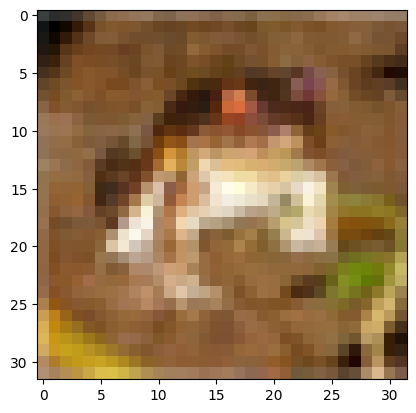

In [6]:
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(AdvancedCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32 * 2, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32 * 2, out_channels=64 * 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64 * 2, out_channels=64 * 2, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=128 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=128 * 2, out_channels=128 * 2, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(in_channels=128 * 2, out_channels=256 * 2, kernel_size=3, padding=1)
        self.conv8 = nn.Conv2d(in_channels=256 * 2, out_channels=256 * 2, kernel_size=3, padding=1)
        self.conv9 = nn.Conv2d(in_channels=256 * 2, out_channels=256 * 2, kernel_size=3, padding=1)

        self.bn1 = nn.BatchNorm2d(32 * 2)
        self.bn2 = nn.BatchNorm2d(128 * 2)
        self.bn3 = nn.BatchNorm2d(256 * 2)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout2d(0.2)

        self.fc1 = nn.Linear(4096 * 2, 4096 * 2)
        self.fc2 = nn.Linear(4096 * 2, 2048 * 2)
        self.fc3 = nn.Linear(2048 * 2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):

        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.maxpool(x)

        x = self.relu(self.bn2(self.conv4(x)))
        x = self.relu(self.conv5(x))
        x = self.relu(self.conv6(x))
        x = self.maxpool(x)
        x = self.dropout(x)

        x = self.relu(self.bn3(self.conv7(x)))
        x = self.relu(self.conv8(x))
        x = self.relu(self.conv9(x))
        x = self.maxpool(x)
        x = self.dropout(x)

        x = torch.flatten(x, start_dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
model = AdvancedCNN()
bad_prediction = model.forward(torch.randn(1, 3, 32, 32))
print(bad_prediction)
real_image = mnist_train[0][0].unsqueeze(0)
import matplotlib.pyplot as plt
plt.imshow(mnist_train[0][0].permute(1, 2, 0))
print(mnist_train[0][1])
good_prediction = model.forward(real_image)
print(good_prediction)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Params: ", count_parameters(model))

In [5]:
from torch.utils.data import DataLoader

# Set hyperparameters
learning_rate = 0.005
batch_size = 10
epochs = 20

# DataLoader for training
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")
    correct = 0
    for testimage in mnist_test:
        a = testimage[0].unsqueeze(0)
        a = model.forward(a)
        if torch.argmax(a) == testimage[1]:
            correct += 1
    print(f"Test Accuracy: {100 * correct / len(mnist_test):.2f}%")

KeyboardInterrupt: 